**CODERS CAVE INTERNSHIP - AUGUST 2023**\
**TASK - BREAST CANCER PREDICTION**\
**NINAD NILESH SUGANDHI**

**Importing neccessary libraries**

In [128]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as ax
from wordcloud import WordCloud
import warnings

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score
from xgboost import XGBClassifier

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

In [103]:
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("D:\\NINAD SUGANDHI\\GOOGLE COLAB\\CODERS CAVE PROJECTS\\Breast Cancer Prediction Dataset.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [7]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [8]:
df.tail(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
559,925291,B,11.51,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,...,12.480,37.16,82.28,474.2,0.12980,0.25170,0.3630,0.09653,0.2112,0.08732
560,925292,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,...,15.300,33.17,100.20,706.7,0.12410,0.22640,0.1326,0.10480,0.2250,0.08321
561,925311,B,11.20,29.37,70.67,386.0,0.07449,0.03558,0.00000,0.00000,...,11.920,38.30,75.19,439.6,0.09267,0.05494,0.0000,0.00000,0.1566,0.05905
562,925622,M,15.22,30.62,103.40,716.9,0.10480,0.20870,0.25500,0.09429,...,17.520,42.79,128.70,915.0,0.14170,0.79170,1.1700,0.23560,0.4089,0.14090
563,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.25420,0.2929,0.09873
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.22160,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.16280,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.14180,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.26500,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.00000,0.2871,0.07039


In [17]:
df.info

<bound method DataFrame.info of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
df.describe

<bound method NDFrame.describe of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181

In [19]:
description = df.describe().T.style.background_gradient(
    cmap='viridis',  # colormap
    low=0, high=1,   # range of colors for the gradient
    axis=None        # gradient across the entire DataFrame
)

# styling attributes
styled_description = description.set_properties(**{'font-size': '10pt', 'text-align': 'center'}).bar(subset=['mean'], color='#FFA07A')

styled_description

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [9]:
df.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
df.shape

(569, 32)

In [12]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [13]:
df.duplicated

<bound method DataFrame.duplicated of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92     

In [14]:
df.empty

False

In [15]:
df.index

RangeIndex(start=0, stop=569, step=1)

In [16]:
df.size

18208

In [23]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

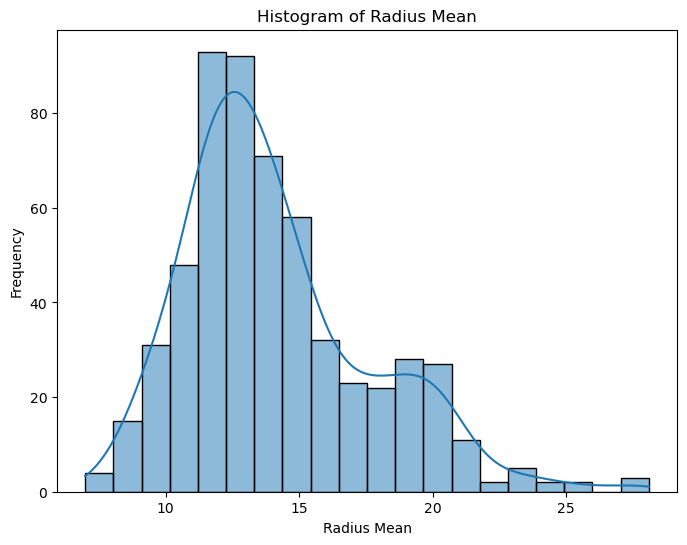

In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['radius_mean'], bins=20, kde=True)
plt.title("Histogram of Radius Mean")
plt.xlabel("Radius Mean")
plt.ylabel("Frequency")
plt.show()

In [48]:
fig = ax.histogram(data_frame=df, x='texture_mean', color='diagnosis',
                   color_discrete_sequence=['#6AC9A1', '#F37167'])

fig.update_layout(
    title="Texture Mean Distribution by Diagnosis",
    xaxis_title="Texture Mean",
    yaxis_title="Count",
    showlegend=True,
    legend_title="Diagnosis",
    barmode='overlay',
    bargap=0.1,  # gap between bars
    width=800,  # Set the width of the plot
    height=500,  # Set the height of the plot
)

# Show the plot
fig.show()

In [49]:
fig = ax.histogram(data_frame=df, x='texture_se', color='diagnosis',
                   color_discrete_sequence=['#6AC9A1', '#F37167'])

fig.update_layout(
    title="Texture SE Distribution by Diagnosis",
    xaxis_title="Texture SE",
    yaxis_title="Count",
    showlegend=True,
    legend_title="Diagnosis",
    barmode='overlay',
    bargap=0.1,  # gap between bars
    width=800,  # Set the width of the plot
    height=500,  # Set the height of the plot
)

# Show the plot
fig.show()

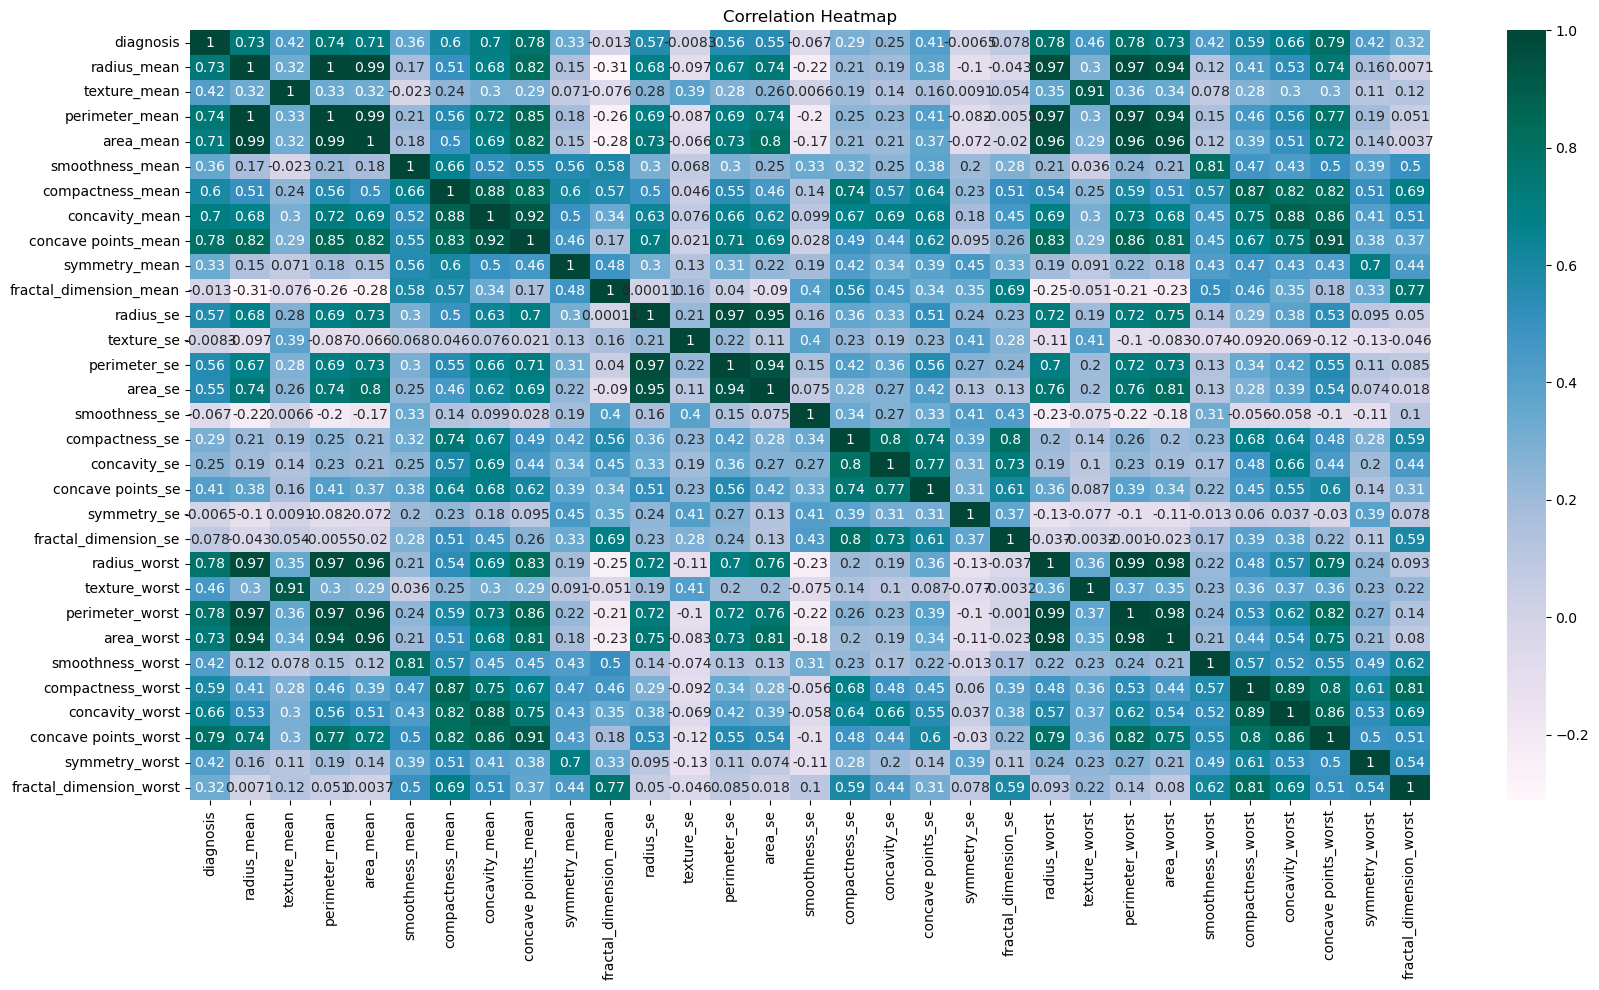

In [58]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='PuBuGn')
plt.title("Correlation Heatmap")
plt.show()

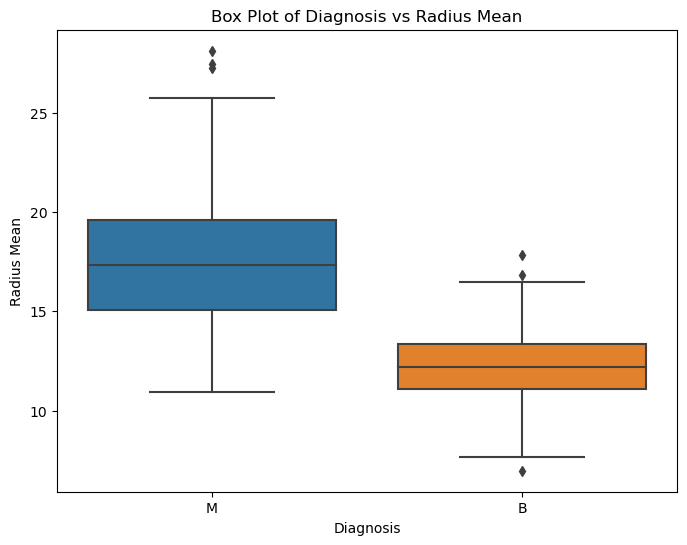

In [31]:
# Box plot of 'diagnosis' vs 'radius_mean'
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Box Plot of Diagnosis vs Radius Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Radius Mean")
plt.show()

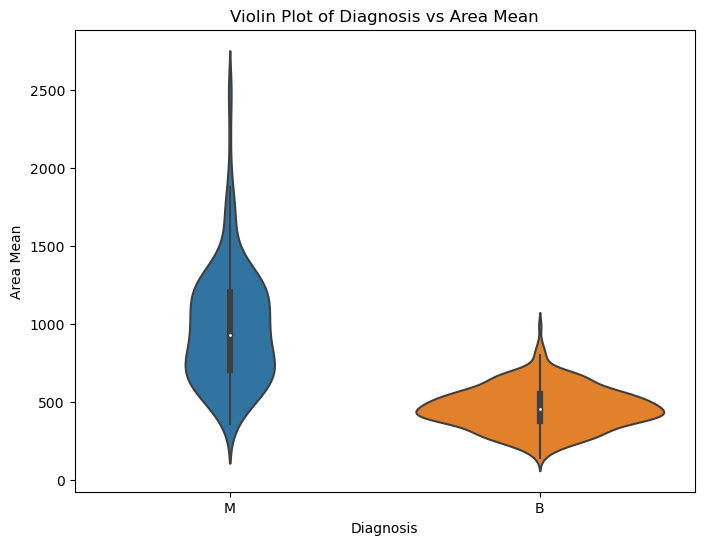

In [32]:
# Violin plot of 'diagnosis' vs 'area_mean'
plt.figure(figsize=(8, 6))
sns.violinplot(x='diagnosis', y='area_mean', data=df)
plt.title("Violin Plot of Diagnosis vs Area Mean")
plt.xlabel("Diagnosis")
plt.ylabel("Area Mean")
plt.show()

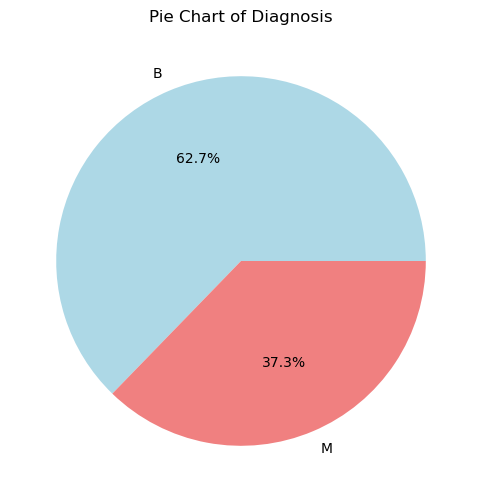

In [37]:
# Pie chart of 'diagnosis'
plt.figure(figsize=(6, 6))
df['diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral'])
plt.title("Pie Chart of Diagnosis")
plt.ylabel("")
plt.show()

In [52]:
fig = px.scatter(data_frame=df, x='smoothness_worst', color='diagnosis',
                 color_discrete_sequence=['#6AC9A1', '#F37167'])

# Update the layout to adjust the size
fig.update_layout(
    title="Smoothness Worst vs Diagnosis",
    xaxis_title="Smoothness Worst",
    yaxis_title="",
    showlegend=True,
    legend_title="Diagnosis",
    width=800,  # Set the width of the plot
    height=500,  # Set the height of the plot
)

# Show the plot
fig.show()

In [53]:
fig = ax.scatter(data_frame=df, x='compactness_worst', color='diagnosis',
                 color_discrete_sequence=['#6AC9A1', '#F37167'])

# Update the layout to adjust the size
fig.update_layout(
    title="Compactness Worst vs Diagnosis",
    xaxis_title="Compactness Worst",
    yaxis_title="",
    showlegend=True,
    legend_title="Diagnosis",
    width=800,  # Set the width of the plot
    height=500,  # Set the height of the plot
)

# Show the plot
fig.show()


In [55]:
df.drop('id', axis=1, inplace=True)

In [56]:
#converting Categorical Data into integer variable where M denotes 1 and B denotes 0
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int)

In [57]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
X = df.drop(['diagnosis'], axis = 1)
y = df['diagnosis']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

#Using Standard Scalar and fitting it to the training data
scaler = StandardScaler()
scaler.fit(X_train)

#Transforming the training and Validation data
scaler.transform(X_train)
scaler.transform(X_test)

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

In [149]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

# Create a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Accuracy', 'F1 Score', 'Precision'])

# Loop through each model, train, predict and calculate metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    
    results = results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision}, ignore_index=True)

# Sort results by F1 Score in descending order
sorted_results = results.sort_values(by='F1 Score', ascending=False)

# Apply styling to the results table
styled_results = sorted_results.style.background_gradient(cmap=sns.color_palette("cool", as_cmap=True))

styled_results

,Model,Accuracy,F1 Score,Precision
3,Random Forest,0.964912,0.964738,0.965205
4,XGBoost,0.956140,0.956036,0.956088
0,Logistic Regression,0.956140,0.955801,0.956905
2,KNN,0.956140,0.955533,0.959026
1,Decision Tree,0.929825,0.929825,0.929825


In [153]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):
    
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=X.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=140)
predictions = model.predict(X_test)

Epoch 1/140
15/15 [==============================] - 2s 4ms/step - loss: 0.9431 - accuracy: 0.4659
Epoch 2/140
15/15 [==============================] - 0s 4ms/step - loss: 0.7509 - accuracy: 0.4154
Epoch 3/140
15/15 [==============================] - 0s 3ms/step - loss: 0.6914 - accuracy: 0.4835
Epoch 4/140
15/15 [==============================] - 0s 4ms/step - loss: 0.6654 - accuracy: 0.5055
Epoch 5/140
15/15 [==============================] - 0s 4ms/step - loss: 0.6573 - accuracy: 0.5626
Epoch 6/140
15/15 [==============================] - 0s 4ms/step - loss: 0.6316 - accuracy: 0.6703
Epoch 7/140
15/15 [==============================] - 0s 3ms/step - loss: 0.6157 - accuracy: 0.7033
Epoch 8/140
15/15 [==============================] - 0s 4ms/step - loss: 0.5870 - accuracy: 0.7341
Epoch 9/140
15/15 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.7319
Epoch 10/140
15/15 [==============================] - 0s 4ms/step - loss: 0.5700 - accuracy: 0.7736
Epoch 11/

In [154]:
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4) 
model_name = 'Neural Network'
# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[model_name, accuracy, f1, precision]], columns=['Model','Accuracy', 'F1_score', 'Precision'])

4/4 [==============================] - 0s 4ms/step


In [155]:
results = results.append({'Model': model_name, 'Accuracy': accuracy, 'F1 Score': f1, 'Precision': precision}, ignore_index=True)

In [156]:
sorted_results = results.sort_values(by='F1 Score', ascending=False)

# Apply styling to the results table
styled_results = sorted_results.style.background_gradient(cmap=sns.color_palette("cool", as_cmap=True))

styled_results

,Model,Accuracy,F1 Score,Precision
3,Random Forest,0.964912,0.964738,0.965205
6,Neural Network,0.973684,0.963855,1.000000
4,XGBoost,0.956140,0.956036,0.956088
0,Logistic Regression,0.956140,0.955801,0.956905
2,KNN,0.956140,0.955533,0.959026
5,Neural Network,0.956140,0.941176,0.952381
1,Decision Tree,0.929825,0.929825,0.929825


In [157]:
color_scale = px.colors.sequential.Viridis

# Create a horizontal bar plot
fig = px.bar(results.iloc[:7], x='Accuracy', y='Model', orientation='h',
             color='Accuracy', color_continuous_scale=color_scale,
             text='Accuracy', title='Top Models by Accuracy',
             labels={'Accuracy': 'Accuracy Score', 'Model': 'Models'},
             template='plotly_white')

# Customize layout
fig.update_layout(width=800, height=500,  # Adjust dimensions as needed
                  xaxis_title='Accuracy Score', yaxis_title='Models',
                  uniformtext_minsize=10, uniformtext_mode='hide',
                  coloraxis_colorbar_title='Accuracy',
                  showlegend=False)  # Remove the legend

# Add rounded rectangle shapes behind the bars for a better visual effect
for i, acc in enumerate(results['Accuracy'].iloc[:7]):
    fig.add_shape(type='rect',
                  x0=0, x1=acc, y0=i - 0.4, y1=i + 0.4,
                  fillcolor=color_scale[i], opacity=0.3,
                  layer='below')

# Show the figure
fig.show()